In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("ratdataNormChecked.csv")
data

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,3,0.714286,10.5,2,5,0.454545,0.000000,0.199546
1,rat2,251,182.0,1,0.010440,0.004396,0.008791,4,0.023077,0.000742,3,3,0.666667,19.5,1,3,0.302198,1.648659,0.478632
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,3,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,,0.293333,0.002178,1,1,0.869565,11.5,9,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,3,8,0.500000,0.000000,0.275200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,3,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,3,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,3,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,3,8,0.380252,1.512927,0.793003


In [2]:
# a) Extract binary features from the Rat data and save the data in transaction form.

transaction = pd.DataFrame()

# First we extract the same features as in Ex. 3 task 2.

def bin_day(x):
    if (166 <= x <= 300):
        return 'summer'
    elif (x != 0):
        return 'winter'
    else:
        return 'freezer'

def bin_weight(x):
    if x <= 162:
        return 'weightlow'
    else:
        return 'weightnormal'   
    
def bin_gender(x):
    if x == 2:
        return 'male'
    else:
        return 'female'
    
def bin_motherhood(x):
    if x in [1,2,3]:
        return 'mother'
    else:
        return 'non-mother'

def bin_liver(x):
    if x <= 0.037:
        return 'liversmall'
    elif x > 0.064:
        return 'liverlarge'
    else:
        return None
    
def bin_femstate(x):
    if x == 1:
        return 'pregnant'
    elif x == 2:
        return 'nursing'
    
def bin_bat(x):
    if x <= 0.00067:
        return 'batlow'
    elif x > 0.00184:
        return 'bathigh'
    
def bin_tail(x):
    if x <= 0.74:
        return 'tailshort'
    elif x > 0.85:
        return 'taillong'

def bin_place(x):
    return 'place{}'.format(x)

def bin_lab(x):
    if x in [1, 2, 3]:
        return 'wild'
    else:
        return 'lab'
    
def bin_adrenal(x):
    if x <= 0.21:
        return 'adrenalsmall'
    elif x > 0.48:
        return 'adrenallarge'
    
def bin_BMI(x):
    if x <= 0.47:
        return 'BMIsmall'
    elif x > 0.75:
        return 'BMIlarge'

# uncomment line below if you want to include the rat id. We don't need it
# for rule  discovery though
# transaction['rat_id'] = data['id']
transaction['born'] = data['day'].map( lambda x: bin_day(x) )
transaction['weight'] = data['weight'].map( lambda x: bin_weight(x) )
transaction['gender'] = data.gender.map( lambda x: bin_gender(x) )
transaction['motherhood'] = data.femstate.map( lambda x: bin_motherhood(x) )
transaction['liver'] = data.liverind.map( lambda x: bin_liver(x) )
transaction['femstate'] = data.femstate.map( lambda x: bin_femstate(x) )
transaction['bat'] = data.batind.map( lambda x: bin_bat(x) )
transaction['tail'] = data.tailind.map( lambda x: bin_tail(x) )
transaction['place'] = data.place.map( lambda x: bin_place(x) )
transaction['origin'] = data.place.map( lambda x: bin_lab(x) )
transaction['adrenal'] = data.ADWBind.map( lambda x: bin_adrenal(x) )
transaction['BMI'] = data.BMI.map( lambda x: bin_BMI(x) )
transaction

,born,weight,gender,motherhood,liver,femstate,bat,tail,place,origin,adrenal,BMI
0,winter,weightlow,female,non-mother,liversmall,None,bathigh,tailshort,place2,wild,None,BMIsmall
1,summer,weightnormal,female,non-mother,liversmall,None,None,tailshort,place1,wild,None,None
2,summer,weightlow,female,non-mother,None,None,None,taillong,place3,wild,adrenallarge,BMIsmall
3,summer,weightlow,male,non-mother,None,None,bathigh,taillong,place9,lab,None,BMIsmall
4,summer,weightlow,female,non-mother,None,None,bathigh,tailshort,place3,wild,adrenallarge,BMIsmall
...,...,...,...,...,...,...,...,...,...,...,...,...
556,winter,weightnormal,female,non-mother,liverlarge,None,bathigh,None,place3,wild,None,None
557,summer,weightnormal,female,non-mother,liverlarge,None,None,None,place3,wild,None,BMIlarge
558,summer,weightnormal,female,non-mother,liverlarge,None,None,None,place3,wild,None,BMIlarge
559,summer,weightnormal,female,non-mother,liverlarge,None,None,tailshort,place3,wild,None,BMIlarge


#### Inventing own binarizations fo rest of the features by plotting attributes and trying to label them based on that.

In [3]:
data

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,3,0.714286,10.5,2,5,0.454545,0.000000,0.199546
1,rat2,251,182.0,1,0.010440,0.004396,0.008791,4,0.023077,0.000742,3,3,0.666667,19.5,1,3,0.302198,1.648659,0.478632
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,3,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,,0.293333,0.002178,1,1,0.869565,11.5,9,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,3,8,0.500000,0.000000,0.275200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,3,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,3,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,3,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,3,8,0.380252,1.512927,0.793003


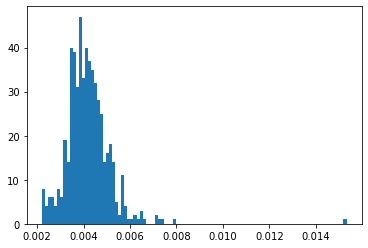

In [4]:
# heartind
plt.hist(data.heartind, bins=100);

In [5]:
def bin_heart(x):
    if x > 0.006:
        return 'bigheart'
    elif x <= 0.003:
        return 'smallheart'
    
transaction['heart'] = data.heartind.map( lambda x: bin_heart(x) )

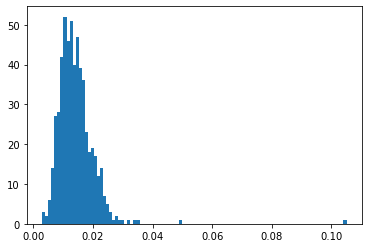

In [6]:
# appind
plt.hist(data.appind, bins=100);

In [7]:
def bin_appweight(x):
    if x > 0.025:
        return 'high-appind'
    else:
        return 'normal-appind'
    
transaction['appind'] = data.appind.map( lambda x: bin_appweight(x) )

(0.0, 0.05)

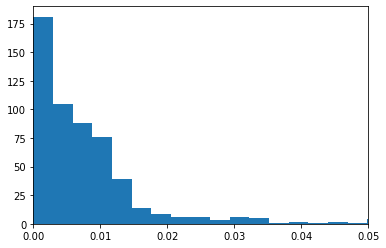

In [8]:
# gonfatind
plt.hist(data.gonfatind, bins=100);
plt.xlim(0,0.05)

In [9]:
def bin_gonfat(x):
    if x > 0.015:
        return 'high-food-intake'
    else:
        return 'normal-food-intake'
    
transaction['gonfat'] = data.gonfatind.map( lambda x: bin_gonfat(x) )

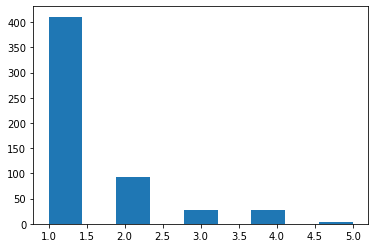

In [10]:
# sulcer
plt.hist(data.sulcer, bins=9);

In [11]:
data.sulcer.describe()

count    561.000000
mean       1.433155
std        0.846994
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: sulcer, dtype: float64

In [12]:
def sulc(x):
    if x > 1:
        return 'has-sulcer'
    else:
        return 'no-sulcer'
    
transaction['sulcer'] = data.sulcer.map( lambda x: sulc(x) )

In [13]:
# kmethod
data.kmethod.describe()

count    561.000000
mean       1.670232
std        1.036816
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: kmethod, dtype: float64

In [14]:
def kmethod(x):
    return 'kmethod{}'.format(x)

transaction['kmethod'] = data.kmethod.map( lambda x: kmethod(x) )

In [15]:
def blength(x):
    if x >= 15:
        return 'adult'
    else:
        return 'child'

transaction['blength'] = data.blength.map( lambda x: blength(x) )

In [16]:
def melatonin(x):
    if x in [7, 8]:
        return 'extra-melatonin'
    else:
        return 'no-extra-melatonin'
    
transaction['melatonin'] = data.place.map( lambda x: melatonin(x) )

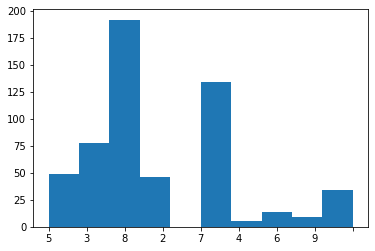

In [17]:
# year
# sulcer
plt.hist(data.year);

In [18]:
np.unique(data.year.values)

array([' ', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [19]:
def year(x):
    if x != ' ':
        if int(x) >= 6:
            return 'late-decade'
        else:
            return 'early-decade'

transaction['year'] = data.year.map( lambda x: year(x) )

In [20]:
# get the final transaction form after labeling binarization

transaction = transaction[transaction.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
transaction = pd.Series(transaction)
transaction

0      winter weightlow female non-mother liversmall ...
1      summer weightnormal female non-mother liversma...
2      summer weightlow female non-mother taillong pl...
3      summer weightlow male non-mother bathigh taill...
4      summer weightlow female non-mother bathigh tai...
                             ...                        
556    winter weightnormal female non-mother liverlar...
557    summer weightnormal female non-mother liverlar...
558    summer weightnormal female non-mother liverlar...
559    summer weightnormal female non-mother liverlar...
560    summer weightnormal female non-mother liverlar...
Length: 561, dtype: object

In [21]:
transaction.to_csv('trans.txt', header=None, index=None, mode='a')

In [22]:
df = pd.read_csv('trans.txt')
df

,winter weightlow female non-mother liversmall bathigh tailshort place2 wild BMIsmall normal-appind normal-food-intake no-sulcer kmethod3 child no-extra-melatonin early-decade
0,summer weightnormal female non-mother liversma...
1,summer weightlow female non-mother taillong pl...
2,summer weightlow male non-mother bathigh taill...
3,summer weightlow female non-mother bathigh tai...
4,summer weightlow female non-mother bathigh pla...
...,...
555,winter weightnormal female non-mother liverlar...
556,summer weightnormal female non-mother liverlar...
557,summer weightnormal female non-mother liverlar...
558,summer weightnormal female non-mother liverlar...


In [91]:
kf = pd.read_csv('kingfisher.txt.names')
kf.index = kf.index + 1
kf

,late-decade -> place3 fr=349 (0.6221),cf=1.000,gamma=1.607,delta=0.235,M=-3.686e+02
1,wild kmethod1 -> late-decade fr=332 (0.5918),cf=0.965,gamma=1.551,delta=0.210,M=-2.614e+02
2,wild kmethod1 -> place3 fr=332 (0.5918),cf=0.965,gamma=1.551,delta=0.210,M=-2.614e+02
3,wild early-decade -> kmethod3 fr=120 (0.2139),cf=0.909,gamma=3.723,delta=0.156,M=-2.013e+02
4,normal-food-intake kmethod1 -> late-decade fr=...,cf=0.881,gamma=1.416,delta=0.170,M=-1.666e+02
5,normal-food-intake kmethod1 -> place3 fr=325 (...,cf=0.881,gamma=1.416,delta=0.170,M=-1.666e+02
...,...,...,...,...,...
95,no-sulcer weightnormal high-food-intake -> kme...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01
96,no-sulcer high-food-intake adult -> kmethod4 f...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01
97,no-sulcer weightnormal high-food-intake -> fre...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01
98,no-sulcer high-food-intake adult -> freezer fr...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01


In [92]:
df = pd.DataFrame(columns=['rule + freq', 'cf', 'lift', 'leverage', 'significance'])
c = kf.columns
df.at[0, :] = kf.columns
kf = kf.rename(columns={c[0]: 'rule + freq',
                        c[1]: 'cf',
                        c[2]: 'lift',
                        c[3]: 'leverage',
                        c[4]: 'significance'
})
df = pd.concat([df, kf], axis=0)
df

,rule + freq,cf,lift,leverage,significance
0,late-decade -> place3 fr=349 (0.6221),cf=1.000,gamma=1.607,delta=0.235,M=-3.686e+02
1,wild kmethod1 -> late-decade fr=332 (0.5918),cf=0.965,gamma=1.551,delta=0.210,M=-2.614e+02
2,wild kmethod1 -> place3 fr=332 (0.5918),cf=0.965,gamma=1.551,delta=0.210,M=-2.614e+02
3,wild early-decade -> kmethod3 fr=120 (0.2139),cf=0.909,gamma=3.723,delta=0.156,M=-2.013e+02
4,normal-food-intake kmethod1 -> late-decade fr=...,cf=0.881,gamma=1.416,delta=0.170,M=-1.666e+02
...,...,...,...,...,...
95,no-sulcer weightnormal high-food-intake -> kme...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01
96,no-sulcer high-food-intake adult -> kmethod4 f...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01
97,no-sulcer weightnormal high-food-intake -> fre...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01
98,no-sulcer high-food-intake adult -> freezer fr...,cf=0.561,gamma=9.263,delta=0.051,M=-7.702e+01


In [96]:
for i in df['rule + freq']:
    print(i[:-15])

late-decade -> place3 
wild kmethod1 -> late-decade 
wild kmethod1 -> place3 
wild early-decade -> kmethod3 
normal-food-intake kmethod1 -> late-decade 
normal-food-intake kmethod1 -> place3 
early-decade lab -> place9
summer lab -> place9
kmethod1 lab -> place9
normal-food-intake kmethod3 early-decade -> place2
late-decade -> kmethod1 
place3 -> kmethod1 
winter kmethod3 early-decade -> place2
wild normal-food-intake early-decade -> place2
winter early-decade -> place2
winter kmethod3 -> place2
kmethod3 early-decade -> place2
normal-food-intake kmethod3 -> place2
no-extra-melatonin lab -> place9
early-decade summer kmethod1 -> place9
kmethod3 -> early-decade 
wild early-decade -> place2
early-decade kmethod1 -> place9
place2 -> kmethod3
kmethod4 -> freezer
wild early-decade summer -> place1
normal-food-intake early-decade -> place2
place9 -> lab
high-food-intake lab smallheart -> kmethod4
high-food-intake lab smallheart -> freezer
high-food-intake smallheart -> kmethod4
lab smallheart

In [97]:
-3.686e+02

-368.6